<a href="https://colab.research.google.com/github/kivvgsr/deep-learning/blob/main/image_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

#data exploration

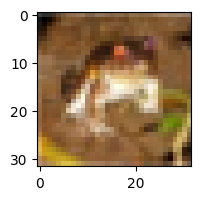

In [5]:
plt.figure(figsize =(15,2))
plt.imshow(x_train[0])

In [6]:
y_train[:5] #here it is the two dimenssional thing lets convert ot into the one dimentional

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train= y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ['airplane','automobiles','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
def plot_samples(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

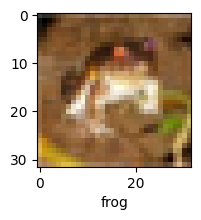

In [10]:
plot_samples(x_train,y_train,0)

#normalization

In [11]:
x_train =x_train/255

In [12]:
x_test = x_test/255

In [13]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer = 'SGD',
            loss='sparse_categorical_crossentropy',
            metrics = ['accuracy'])
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 9s 4ms/step - loss: 1.8126 - accuracy: 0.3540
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6225 - accuracy: 0.4284
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5413 - accuracy: 0.4590
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4833 - accuracy: 0.4762
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4326 - accuracy: 0.4967


In [14]:
from sklearn.metrics import confusion_matrix ,  classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('classification report: \n',classification_report(y_test,y_pred_classes))

313/313 [==============================] - 1s 2ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.37      0.78      0.50      1000
           1       0.72      0.45      0.55      1000
           2       0.37      0.35      0.36      1000
           3       0.30      0.50      0.38      1000
           4       0.58      0.16      0.25      1000
           5       0.39      0.36      0.37      1000
           6       0.54      0.52      0.53      1000
           7       0.55      0.55      0.55      1000
           8       0.80      0.30      0.44      1000
           9       0.53      0.61      0.56      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



#lets use the convolution neural network

In [19]:
cnn = models.Sequential([

    #cnn layers
    layers.Conv2D(filters=42 , kernel_size = (3,3) ,activation = 'relu',input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters=52 , kernel_size = (3,3) ,activation = 'relu'),
    layers.MaxPool2D((2,2)),


    #dense network

    layers.Flatten(), # in the middel of the layer there is no need to write the input shape the network will figure it out the size
    layers.Dense(64,activation='relu'),

    layers.Dense(10,activation='softmax') # here by using the sofmax we will get the values between the 0,1
])


cnn.compile(optimizer = 'SGD',
            loss='sparse_categorical_crossentropy',
            metrics = ['accuracy'])
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.9984 - accuracy: 0.2750
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6515 - accuracy: 0.4091
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4693 - accuracy: 0.4752
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3594 - accuracy: 0.5143
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2730 - accuracy: 0.5518
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1974 - accuracy: 0.5812
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1310 - accuracy: 0.6034
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0760 - accuracy: 0.6239
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0297 - accuracy: 0.6414
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.986

In [20]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0472 - accuracy: 0.6343


[1.047183632850647, 0.6342999935150146]

sofmax :
1:0.46
2:0.56

(0.46)/(0.46+0.56) = 0.4 that is with in the range of 0 1

In [21]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

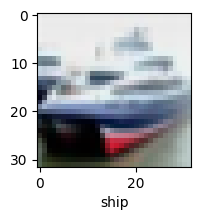

In [24]:
y_test = y_test.flatten()
plot_samples(x_test, y_test, 1)

In [25]:
y_pred = cnn.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [26]:
y_pred[:5]

array([[9.34632681e-03, 1.86369551e-04, 1.27946541e-01, 5.75915098e-01,
        6.52724272e-03, 2.21339703e-01, 3.41854952e-02, 2.85261427e-03,
        2.05339640e-02, 1.16664229e-03],
       [7.09702820e-02, 2.67772138e-01, 1.50788037e-04, 3.00103693e-05,
        4.29711436e-05, 2.19458780e-05, 1.41765486e-06, 9.88869760e-06,
        6.13701582e-01, 4.72989231e-02],
       [1.05241932e-01, 1.33789286e-01, 1.94649410e-03, 2.78243446e-03,
        3.25232116e-03, 1.05447276e-03, 1.03000806e-04, 1.21579680e-03,
        7.20402777e-01, 3.02114822e-02],
       [7.55770922e-01, 2.12364714e-03, 1.04251122e-02, 8.53482052e-04,
        9.08776093e-03, 1.99956950e-04, 3.76521319e-04, 3.26881022e-03,
        2.17287347e-01, 6.06452755e-04],
       [9.04285334e-05, 1.18674303e-04, 2.33822260e-02, 1.46644086e-01,
        7.03383625e-01, 7.99208656e-02, 4.30037528e-02, 1.17440696e-03,
        1.97557895e-03, 3.06413334e-04]], dtype=float32)

In [27]:
y_class = [np.argmax(element) for element in y_pred]
y_class[:5]

[3, 8, 8, 0, 4]

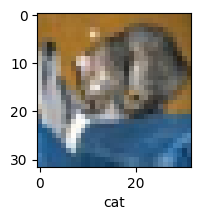

In [29]:
plot_samples(x_test,y_test,0)

In [30]:
classes[y_class[0]]

'cat'